In [1]:
from importlib import reload
from src.GEFConstructor import CreateGEF
import matplotlib.pyplot as plt
import numpy as np

In [2]:

#GEFComp = CreateGEF("Config/SchwingerGEF+beta25+Mass+OldMix.py")
GEFComp = CreateGEF("Config/ClassicGEF+beta30+Mass6e-6.py")
GEFComp.Unitless()
print("GEFComp loaded")

atol = 1e-20 
rtol = 1e-6
GEF1 = CreateGEF("Config/ClassicGEF-Test.py")
ntr = int(3*GEF1.beta)
sol = GEF1.RunGEF(ntr, reachNend=True, printstats=True, atol=atol, rtol=rtol)

/home/users/rfreiher/Documents/Axion_Inflation/GEF/src/GEFConstructor.py:103: UserWarning: 
No file found under Modes/MbM+beta30+Mass6e-6.dat. This path is treated as default for storing mode-by-mode data.
  warnings.warn(warning)


GEFComp loaded
No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
Attempting first run with ntr=91
The end of inflation was not reached by the solver. Increasing tend by 35.0 to 155.0.
The end of inflation was not reached by the solver. Increasing tend by 66.0 to 221.0.
The end of inflation was not reached by the solver. Increasing tend by 192.0 to 413.0.


/home/users/rfreiher/Documents/Axion_Inflation/GEF/src/GEFClassic/GEFClassic.py:206: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(Hsq)


The run failed at t=255.82123447016434, N=70.31157032953908.
Increasing ntr by 10 to 101.
The end of inflation was reached at t=332.9 and N=71.66.
To ensure a convergent run, check stability against increasing ntr.
Increasing ntr by 10 to 111.
The solver aims at reaching t=413.0
The end of inflation was reached at t=334.1 and N=71.67.
To ensure a convergent run, check stability against increasing ntr.
Increasing ntr by 10 to 121.
The solver aims at reaching t=335.0
The end of inflation was reached at t=334.1 and N=71.67.
Elapsed time: 571.5124 seconds
The run terminated with the following statistics:
nfev : [29372]
njev : 0
nlu : 0
status : 1
message : A termination event occurred.
success : True
attempts : 7
The following events occured during the run:
End of inflation at t=[334.1] or N=[71.667]


In [3]:
print(GEF1.vals.keys())

dict_keys(['phi', 'dphi', 't', 'N', 'a', 'kh', 'E', 'B', 'G', 'H', 'Hprime', 'xi', 'ddphi', 'dlnkh'])


In [5]:
print(GEF1.vals["F"].shape)

KeyError: 'F'

In [6]:
GEF1.SaveData()

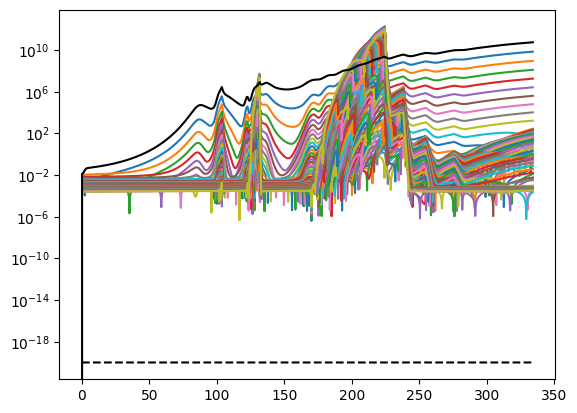

3.8149047343968986e-07 1781551945634.9438 4.669977547726603e+18


In [ ]:
minval = 1
maxval = 1
for i in range(1,ntr):
    arr = abs(sol.y[4+3*i,:][10:])
    minval = min(min(arr), minval)
    maxval = max(max(arr), maxval)
    plt.plot(sol.t[10:], arr)
plt.yscale("log")
#plt.plot(sol.t, 1e25*sol.y[2], "k--")
plt.plot(sol.t, sol.y[4,:], "k")
plt.plot(sol.t, np.ones(sol.t.shape)*atol, "k--")
plt.show()
print(minval, maxval, maxval/minval)

72.04253731866578
71.66741734925047


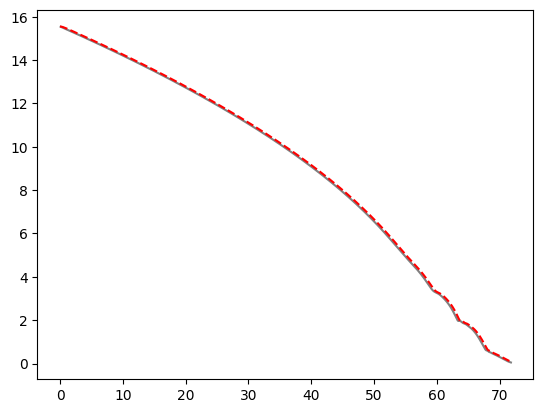

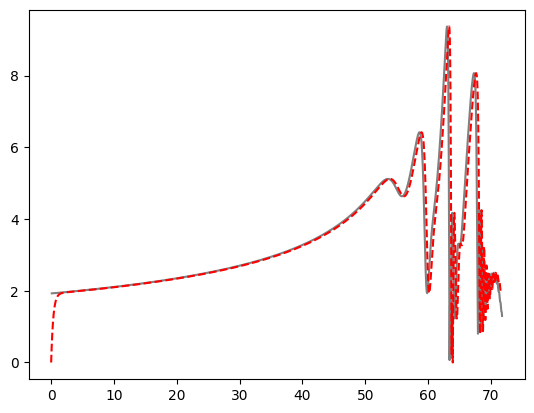

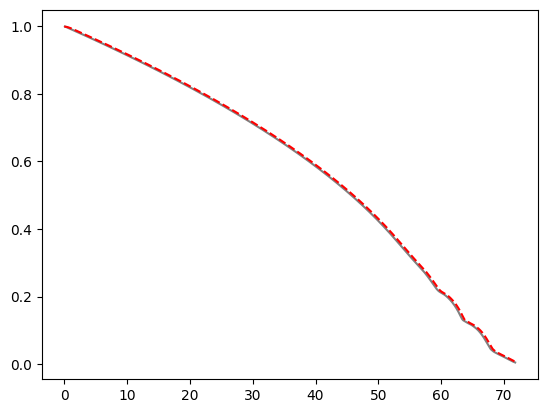

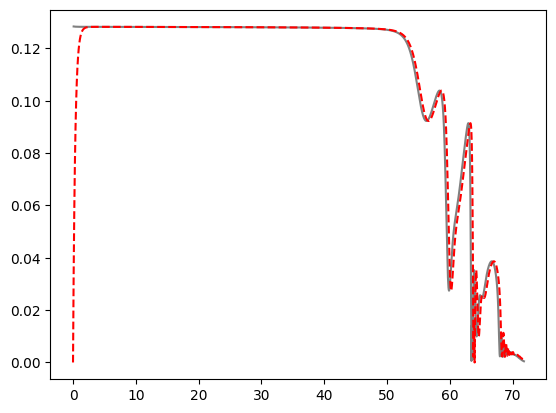

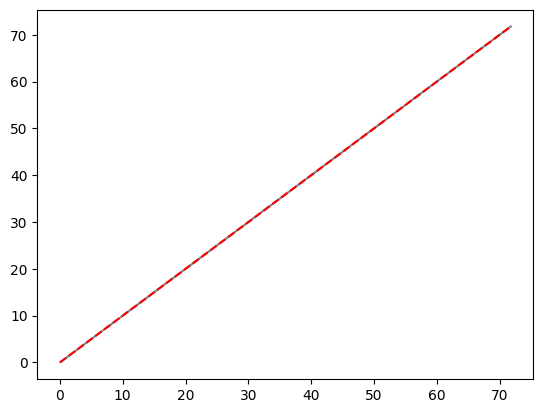

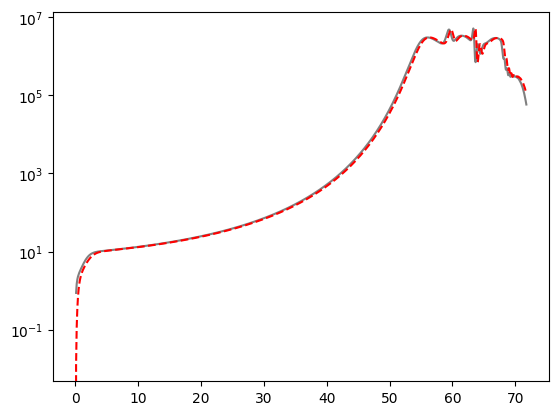

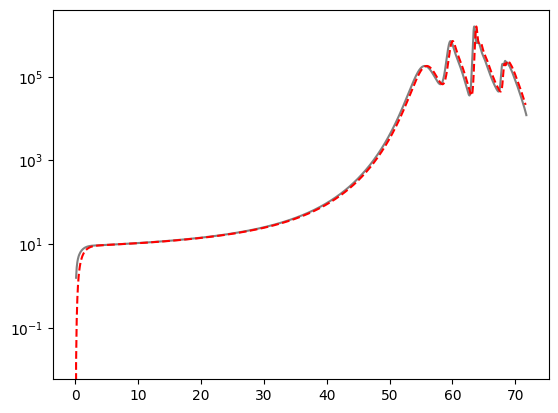

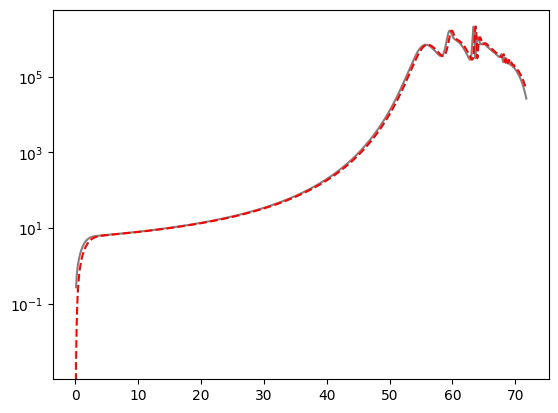

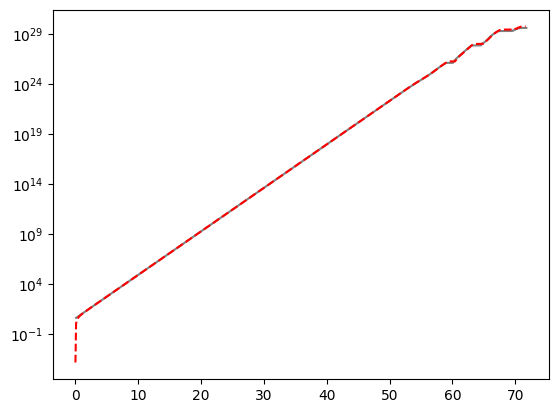

In [ ]:
keys = ["phi", "xi", "H", "dphi", "N"]
Nend1 = GEFComp.EndOfInflation()
print(Nend1)
Nend2 = GEF1.Nend
print(Nend2)
for key in keys:
    plt.plot(GEFComp.vals["N"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["N"], abs(GEF1.vals[key]), "r--")
    #plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    #plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.show()
keys = ["E", "B", "G", "kh"]
for key in keys:
    plt.plot(GEFComp.vals["N"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["N"], abs(GEF1.vals[key]), "r--")
    #plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    #plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.yscale("log")
    plt.show()
        
